# First AI Project

* Sude Naz Öztürk 2220765041
* Esmanur Berdan 2220765044
* Ecesu Aracı 2230765019

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Necessary Imports

In [173]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import (
    precision_score,
    recall_score,
    roc_curve)
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  make_scorer, f1_score
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


## Step 1: Data Collection


### Dataset Path: "https://www.kaggle.com/datasets/rabieelkharoua/air-quality-and-health-impact-dataset"

In [174]:
# Load the dataset
first_df = pd.read_csv('https://drive.google.com/file/d/1Bi8mhAH2e73pD2xYId8qm-G7sGS87bJ7/view?usp=drive_link')
first_df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


## Data Overview

 This dataset contains comprehensive information on the air quality and its impact on public health for 5,811 records. It includes variables such as air quality index (AQI), concentrations of various pollutants, weather conditions, and health impact metrics. The target variable is the health impact class, which categorizes the health impact based on the air quality and other related factors.

### Feature explanation:

### Record Information
 * RecordID: A unique identifier assigned to each record (1 to 2392).

### Air Quality Metrics
 * AQI: Air Quality Index, a measure of how polluted the air currently is or how polluted it is forecast to become.
 * PM10: Concentration of particulate matter less than 10 micrometers in diameter (μg/m³).
 * PM2_5: Concentration of particulate matter less than 2.5 micrometers in diameter (μg/m³).
 * NO2: Concentration of nitrogen dioxide (ppb).
 * SO2: Concentration of sulfur dioxide (ppb).
 * O3: Concentration of ozone (ppb).

### Weather Conditions
 * Temperature: Temperature in degrees Celsius (°C).
 * Humidity: Humidity percentage (%).
 * WindSpeed: Wind speed in meters per second (m/s).

### Health Impact Metrics
 * RespiratoryCases: Number of respiratory cases reported.
 * CardiovascularCases: Number of cardiovascular cases reported.
 * HospitalAdmissions: Number of hospital admissions reported.

### Target Variable: Health Impact Class
 * HealthImpactScore: A score indicating the overall health impact based on air quality and other related factors, ranging from 0 to 100.
 * HealthImpactClass: Classification of the health impact based on the health impact score:

    * 0: 'Very High' (HealthImpactScore >= 80)
    * 1: 'High' (60 <= HealthImpactScore < 80)
    * 2: 'Moderate' (40 <= HealthImpactScore < 60)
    * 3: 'Low' (20 <= HealthImpactScore < 40)
    * 4: 'Very Low' (HealthImpactScore < 20)


---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 2: Data Preprocessing and Cleaning

In [175]:
# Check for missing values
print(first_df.isnull().sum())

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64


As you can see above, there is no null value in this dataset.

In [176]:
first_df = first_df.round(2)
first_df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.27,295.85,13.04,6.64,66.16,54.62,5.15,84.42,6.14,7,5,1,97.24,0.0
1,2,475.36,246.25,9.98,16.32,90.50,169.62,1.54,46.85,4.52,10,2,0,100.00,0.0
2,3,366.00,84.44,23.11,96.32,17.88,9.01,1.17,17.81,11.16,13,3,0,100.00,0.0
3,4,299.33,21.02,14.27,81.23,48.32,93.16,21.93,99.47,15.30,8,8,1,100.00,0.0
4,5,78.01,16.99,152.11,121.24,90.87,241.80,9.22,24.91,14.53,9,0,1,95.18,0.0


We simplified the numbers in the data set by rounding. In this way, we saved unnecessary sensitivity for analysis or modelling.

In [177]:
# We examine the data types
first_df.dtypes

RecordID                 int64
AQI                    float64
PM10                   float64
PM2_5                  float64
NO2                    float64
SO2                    float64
O3                     float64
Temperature            float64
Humidity               float64
WindSpeed              float64
RespiratoryCases         int64
CardiovascularCases      int64
HospitalAdmissions       int64
HealthImpactScore      float64
HealthImpactClass      float64
dtype: object

In [178]:
# Removing unnecessary columns

first_df = first_df.drop(columns=['RecordID'])
first_df = first_df.drop(columns=['HealthImpactScore'])
first_df.head()


,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactClass
0,187.27,295.85,13.04,6.64,66.16,54.62,5.15,84.42,6.14,7,5,1,0.0
1,475.36,246.25,9.98,16.32,90.50,169.62,1.54,46.85,4.52,10,2,0,0.0
2,366.00,84.44,23.11,96.32,17.88,9.01,1.17,17.81,11.16,13,3,0,0.0
3,299.33,21.02,14.27,81.23,48.32,93.16,21.93,99.47,15.30,8,8,1,0.0
4,78.01,16.99,152.11,121.24,90.87,241.80,9.22,24.91,14.53,9,0,1,0.0


We must delete the column named 'RecordID'. Because this column does not contain meaningful values.
We delete the 'HealthImpactScore' because our problem is a classification problem, so the target variable must be discrete.

In [179]:
# Check for duplicates
duplicate_count = first_df.duplicated().sum()
print(f"Number of duplicated values: {duplicate_count}")

Number of duplicated values: 0


In [180]:
# Check for unique values
unique_counts = first_df.nunique()
print(unique_counts)

AQI                    5478
PM10                   5316
PM2_5                  5043
NO2                    5079
SO2                    4417
O3                     5294
Temperature            3411
Humidity               4284
WindSpeed              1886
RespiratoryCases         23
CardiovascularCases      15
HospitalAdmissions       10
HealthImpactClass         5
dtype: int64


We preserved other unique values because they contain meaningful values for the data set.

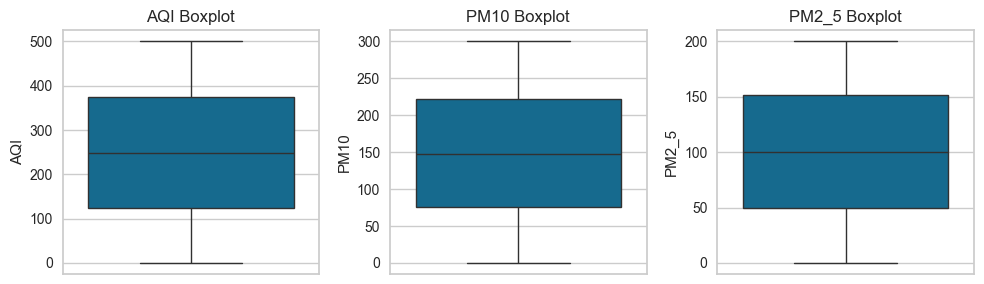

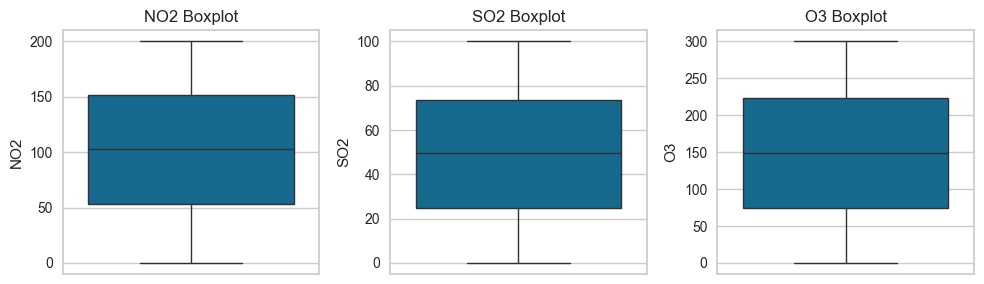

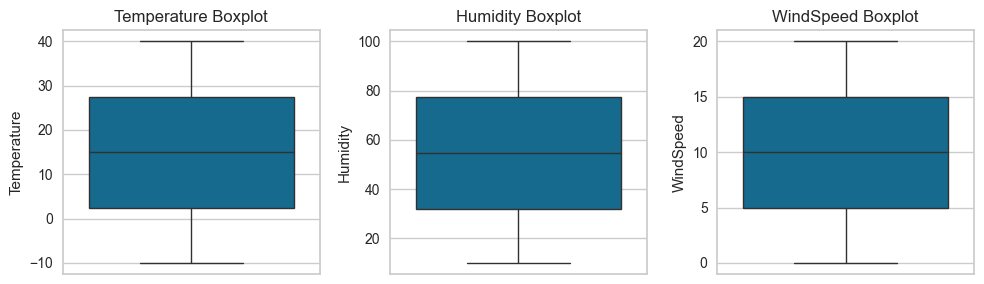

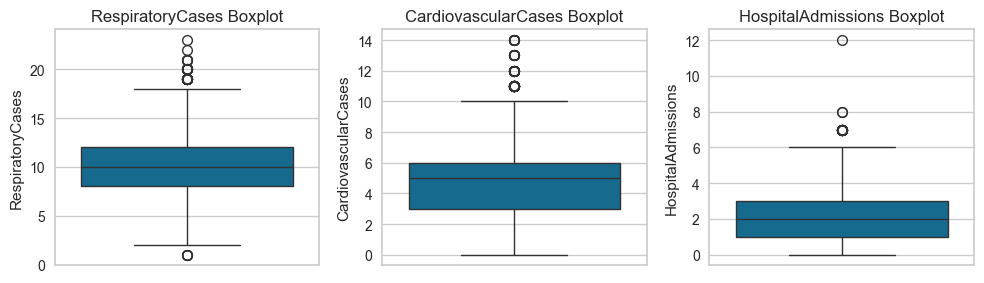

<Figure size 1000x300 with 0 Axes>

In [181]:
without_target_df = first_df.drop(columns=['HealthImpactClass'])

plt.figure(figsize=(10, 3))
for i, col in enumerate(without_target_df.columns):
    plt.subplot(1, 3, (i % 3) + 1)
    sns.boxplot(y=without_target_df[col])
    plt.title(f'{col} Boxplot')

    if (i + 1) % 3 == 0:
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(10, 3))

plt.tight_layout()
plt.show()


Here we wanted to see the distribution of outliers through their graphics before outlier detection and handling. As you can be seen in the graphs above, there are outliers only in the 'RespiratoryCases', 'CardiovascularCases' and 'HospitalAdmissions' columns.

In [182]:
# Outlier detection with IQR (Interquartile Range) method

for col in without_target_df.columns:
    # Calculate Q1, Q3, and IQR
    Q1 = without_target_df[col].quantile(0.25)
    Q3 = without_target_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = without_target_df[(without_target_df[col] < lower_bound) | (without_target_df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Print results for each column
    print(f"Column: {col}")
    print(f"  Outlier Count: {outlier_count}")
    print("-" * 30)

Column: AQI
  Outlier Count: 0
------------------------------
Column: PM10
  Outlier Count: 0
------------------------------
Column: PM2_5
  Outlier Count: 0
------------------------------
Column: NO2
  Outlier Count: 0
------------------------------
Column: SO2
  Outlier Count: 0
------------------------------
Column: O3
  Outlier Count: 0
------------------------------
Column: Temperature
  Outlier Count: 0
------------------------------
Column: Humidity
  Outlier Count: 0
------------------------------
Column: WindSpeed
  Outlier Count: 0
------------------------------
Column: RespiratoryCases
  Outlier Count: 42
------------------------------
Column: CardiovascularCases
  Outlier Count: 74
------------------------------
Column: HospitalAdmissions
  Outlier Count: 31
------------------------------


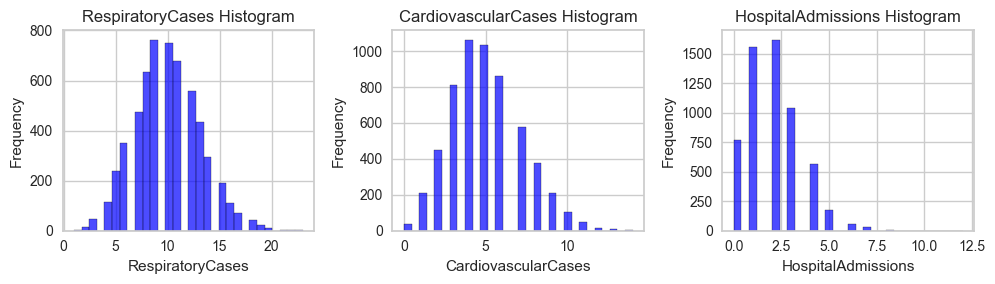

In [183]:
outlier_col_df = first_df[['RespiratoryCases','CardiovascularCases','HospitalAdmissions']]

# Visualizing all columns with histogram
plt.figure(figsize=(10, 3))
for i, col in enumerate(outlier_col_df.columns):
    plt.subplot((len(outlier_col_df.columns) + 2) // 3, 3, i + 1)
    plt.hist(outlier_col_df[col], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Here we want to see the distribution of outliers for applying which method to handle it.

In [184]:
columns_to_handle = {
    'RespiratoryCases': 'mean',
    'CardiovascularCases': 'median',
    'HospitalAdmissions': 'median'
}

for col, method in columns_to_handle.items():
    # Calculate IQR
    Q1 = first_df[col].quantile(0.25)
    Q3 = first_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Determine the mean or median
    if method == 'mean':
        value = first_df[col].mean()
    elif method == 'median':
        value = first_df[col].median()

    # Update outliers
    first_df[col] = first_df[col].apply(
        lambda x: value if x < lower_bound or x > upper_bound else x
    )

We used the mean imputation method in the 'respiratory cases' column because the distribution appeared symmetrical, and the median imputation method in the others because it appeared  slightly more asymmetrical.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Step 3: Data Exploration and Analysis


In [185]:
first_df.describe()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,248.438539,148.654965,100.223741,102.293512,49.456823,149.312380,14.975503,54.776901,9.989165,9.916867,4.904664,1.973154,0.281191
std,144.777646,85.698541,58.096560,57.713222,28.530272,86.534179,14.483083,26.020802,5.776969,3.018414,2.082101,1.343808,0.714075
min,0.010000,0.020000,0.030000,0.010000,0.010000,0.000000,-9.990000,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,122.950000,75.375000,49.435000,53.540000,24.885000,74.000000,2.480000,31.995000,4.950000,8.000000,3.000000,1.000000,0.000000
50%,249.130000,147.630000,100.510000,102.990000,49.530000,149.560000,14.940000,54.540000,10.050000,10.000000,5.000000,2.000000,0.000000
75%,373.630000,222.435000,151.340000,151.660000,73.345000,223.380000,27.465000,77.640000,14.975000,12.000000,6.000000,3.000000,0.000000
max,499.860000,299.900000,199.980000,199.980000,99.970000,299.940000,39.960000,100.000000,20.000000,18.000000,10.000000,6.000000,4.000000


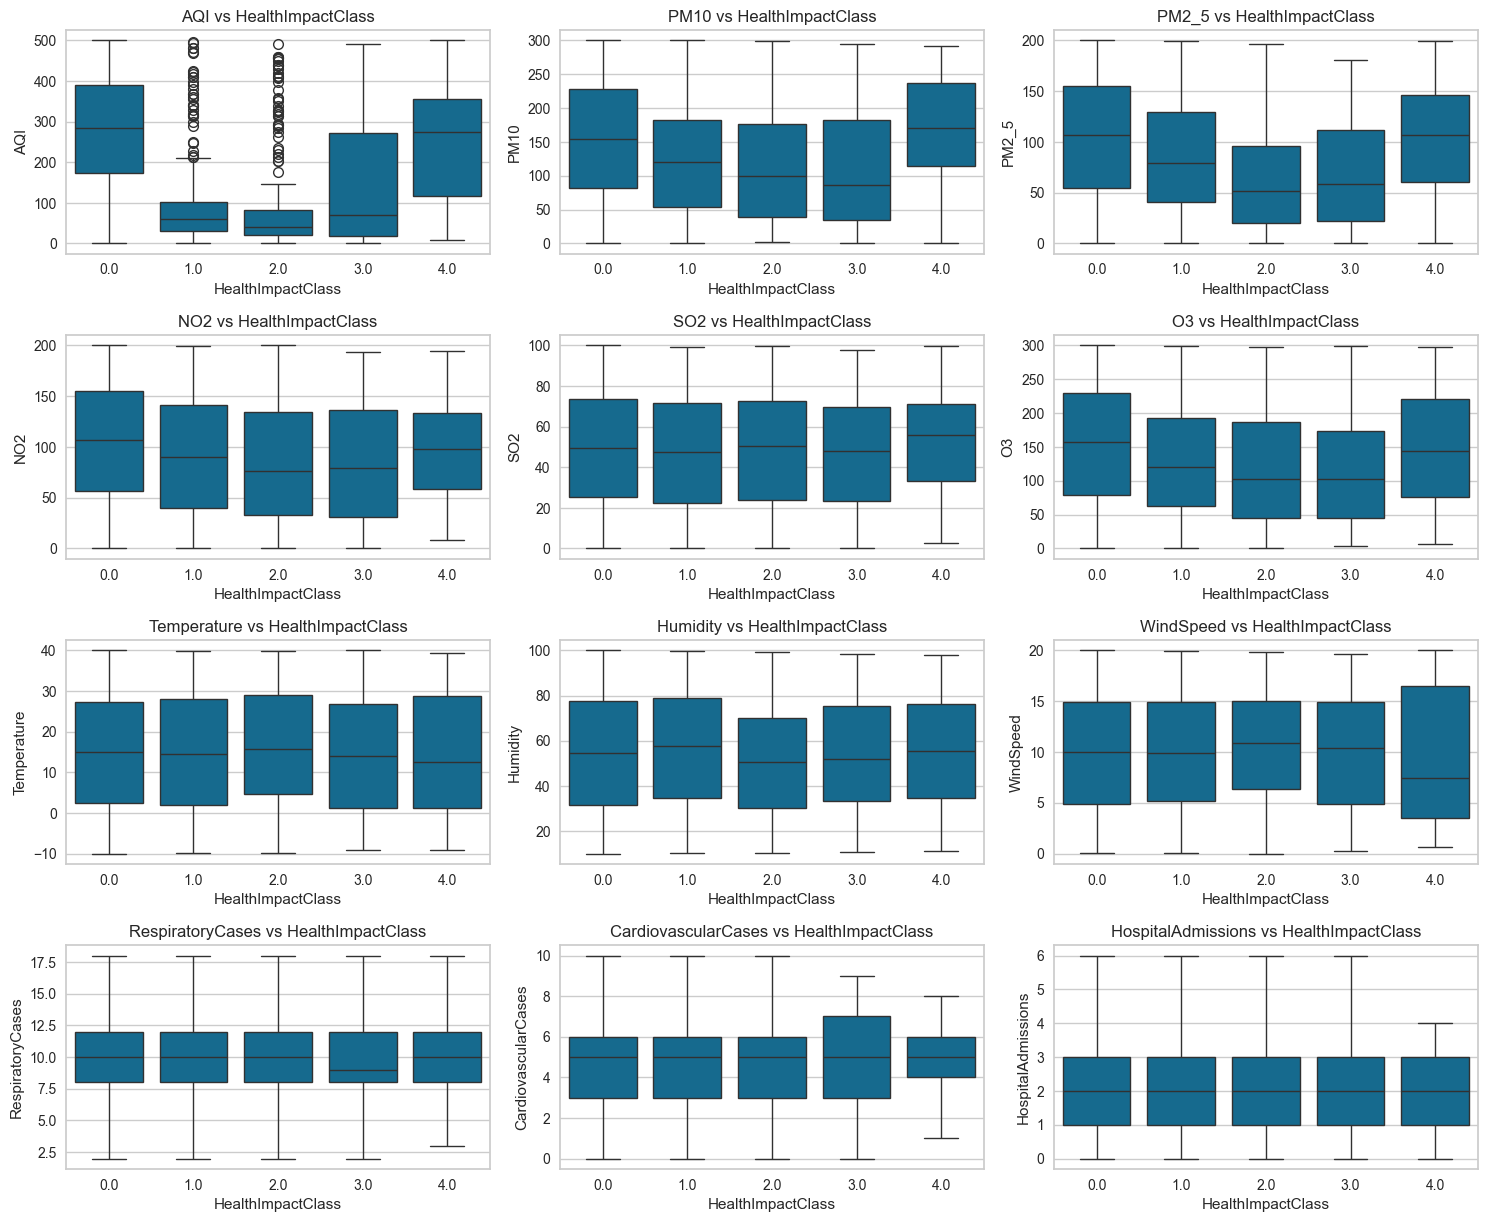

In [186]:
# Visualize the target variable with respect to the features
target = 'HealthImpactClass'

# Relationship between all features and target variable
plt.figure(figsize=(15, 15))
for i, col in enumerate(first_df.columns):
    if col != target:
        plt.subplot((len(first_df.columns) + 2) // 3, 3, i + 1)
        sns.boxplot(x=first_df[target], y=first_df[col])
        plt.title(f'{col} vs {target}')
        plt.xlabel(target)
        plt.ylabel(col)

plt.tight_layout()
plt.show()

We created boxplots for each feature in the dataset, with the x-axis representing the target variable (HealthImpactClass) and the y-axis representing the feature values. This approach allows us to observe the variations in feature distributions across different classes of the target variable.

* Features such as AQI, PM10, and PM2_5 exhibit noticeable differences in their distributions across different HealthImpactClass categories, that means these features might be strong predictors for the target variable.

* For some features like Humidity, WindSpeed, and HospitalAdmissions, the distributions across HealthImpactClass appear more uniform, that means these features might be weaker predictive power.

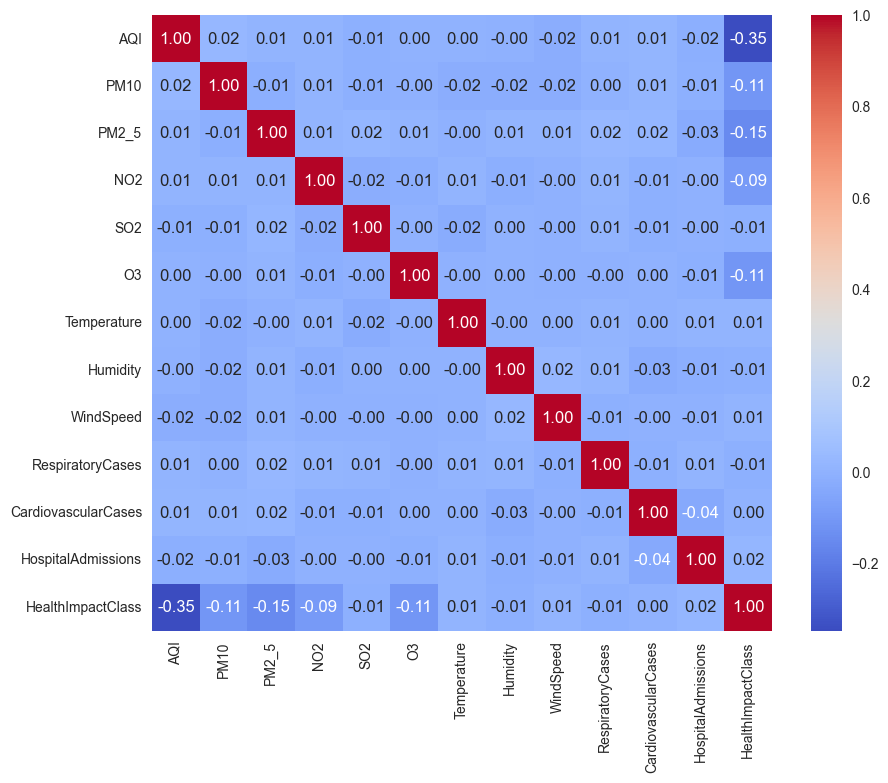

In [187]:
# Correlation matrix

plt.figure(figsize=(10, 8))
correlation_matrix = first_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

We constructed the correlation matrix to examine the relationships between all features and the target variable (HealthImpactClass) in the dataset. This analysis helps identify features that have strong linear relationships with the target variable or with each other.

* AQI (-0.35): Shows the strongest negative correlation with HealthImpactClass. This indicates that as air quality improves, the health impact score decreases.
* PM2_5 (-0.15): Also exhibits a weak negative correlation with HealthImpactClass.
* Other features such as PM10, NO2, and O3 have very weak correlations with the target variable, suggesting limited predictive power.
* AQI, PM2_5, and PM10 show slight correlations among themselves, which is expected as they are all related to air quality measurements.
* Features such as Humidity, WindSpeed, and HospitalAdmissions have almost no correlation with the target variable or other features, indicating they might not contribute significantly to model performance.

#### Clustering Analysis

In [188]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(first_df)

columns = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
           'Humidity','WindSpeed','RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions','HealthImpactClass']

scaled_df = pd.DataFrame(scaled_df, columns=columns)

scaled_df_without_target = scaled_df.drop(columns=['HealthImpactClass'])

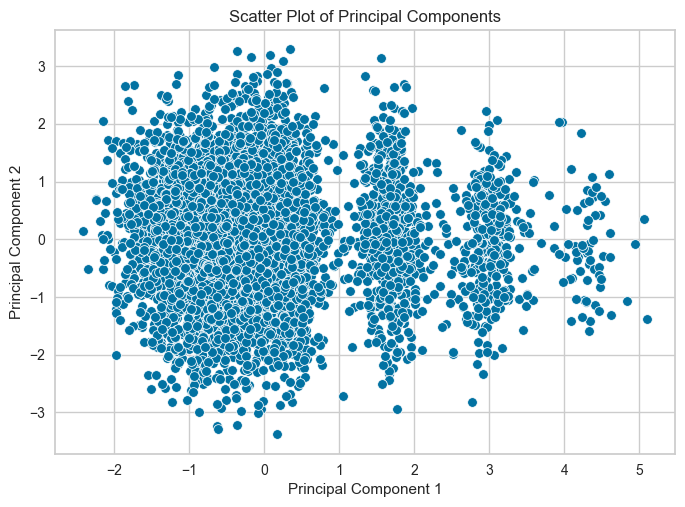

In [189]:
# Perform Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA()
pca_test = pca.fit_transform(scaled_df)  # Transform the data using PCA

# Add the first two principal components to the DataFrame for visualization
scaled_df['pa1'] = pca_test[:, 0]
scaled_df['pa2'] = pca_test[:, 1]

# Create a scatter plot of the first two principal components
sns.scatterplot(data=scaled_df, x=scaled_df['pa1'], y=scaled_df['pa2'])
plt.title("Scatter Plot of Principal Components")  # Title for the plot
plt.xlabel("Principal Component 1")  # Label for the x-axis
plt.ylabel("Principal Component 2")  # Label for the y-axis
plt.show()

PCA Analysis
* Scatter Plot: The first two principal components (PC1 and PC2) capture 17.77% of the variance, allowing 2D visualization. Overlapping areas indicate some cluster overlap.


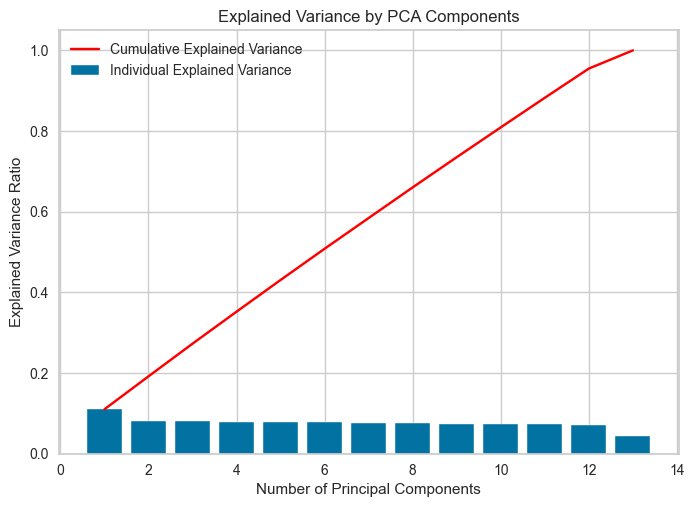

In [190]:
# Calculate explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
cumulative = np.cumsum(explained_variance)  # Calculate cumulative explained variance

# Plot the explained variance for individual and cumulative components
plt.bar(range(1, len(explained_variance) + 1), explained_variance, label="Individual Explained Variance")
plt.plot(range(1, len(cumulative) + 1), cumulative, label="Cumulative Explained Variance", color="red")
plt.title("Explained Variance by PCA Components")  # Title for the plot
plt.xlabel("Number of Principal Components")  # Label for the x-axis
plt.ylabel("Explained Variance Ratio")  # Label for the y-axis
plt.legend()  # Add legend to the plot
plt.show()

The first few components explain a significant portion of the variance, while the remaining components carry minimal information.

In [191]:
# Dimension reduction with PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_df_without_target)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.08943249 0.08836568]


Explained Variance: PC1 explains 8.94%, and PC2 explains 8.83%. More components may be needed to capture the dataset's full complexity.


In [192]:
# The number of clusters with the highest silhouette score is selected as the "best number of clusters."
scores = []
i = 2
for n_clusters in range(2,11):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(reduced_features)
    centers = km.cluster_centers_
    score = silhouette_score(reduced_features, preds, metric='euclidean')
    scores.append(score)

for score in scores:
    if score == max(scores):
        best_n_clusters = i
    i += 1

print ("For n_clusters = {}, silhouette score is {}".format(best_n_clusters, "{:.3f}".format(max(scores))))


For n_clusters = 3, silhouette score is 0.333


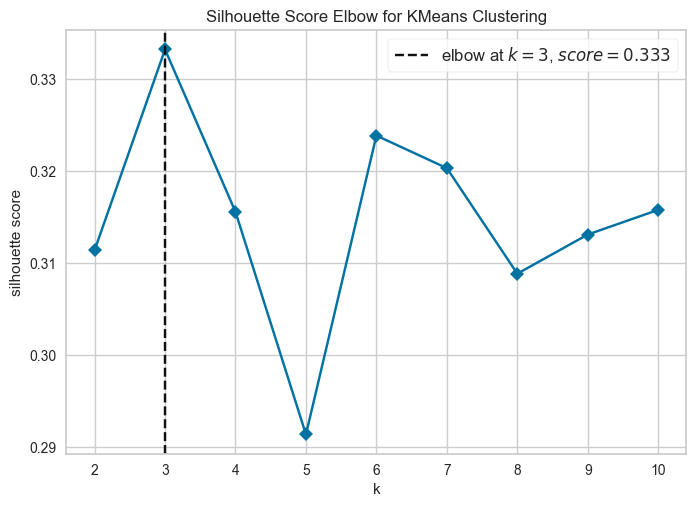

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [193]:
km = KMeans (n_clusters=best_n_clusters)
visualizer = KElbowVisualizer(
    km, k=(2,11),metric ='silhouette', timings=False
)

visualizer.fit(reduced_features) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

Clustering Analysis
* Optimal Clusters: Using the silhouette score, the best number of clusters is k=3, with a moderate score of 0.333. The elbow method confirms k=3 as optimal.
* Insights: Clusters are moderately distinct but show overlap, consistent with the PCA results.

Conclusion
* PCA effectively reduces dimensions but leaves some complexity unexplained.
The clustering results are reasonable.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Step 4: Predictive Modelling


In [194]:
# Separating X and y
X = first_df.drop(columns=['HealthImpactClass'])  # Features
y = first_df['HealthImpactClass']  # Target

# Print the initial class distribution
print("Original Target Variable Distribution:")
print(y.value_counts())


Original Target Variable Distribution:
HealthImpactClass
0.0    4808
1.0     579
2.0     273
3.0      95
4.0      56
Name: count, dtype: int64


Here we observe that there is an imbalance situation in the distribution of the target variable. Because of this we apply SMOTETomek to the data.

In [195]:
# Applying SMOTETomek to the data
smote_tomek = SMOTETomek(random_state=40)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X, y)

# Print class distribution after SMOTETomek
print("\nClass Distribution After SMOTETomek:")
print(Counter(y_smote_tomek))



Class Distribution After SMOTETomek:
Counter({4.0: 4808, 3.0: 4807, 2.0: 4803, 1.0: 4802, 0.0: 4798})


We also tried SMOTE and under sampling, but SMOTETomek was the one that gave the best result.

In [196]:
# Splitting into Training and Testing Sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote_tomek, y_smote_tomek, test_size=0.2, stratify=y_smote_tomek, random_state=42)

# Scaling the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define StratifiedKFold for Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scorer for F1 Macro
scorer = make_scorer(f1_score, average='macro')

### Logistic Regression

In [197]:
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
print("\nClassification Report (Logistic Regression on Test Set):")
print(classification_report(y_test, y_pred_log_reg))


Classification Report (Logistic Regression on Test Set):
              precision    recall  f1-score   support

         0.0       0.41      0.38      0.39       960
         1.0       0.49      0.58      0.53       960
         2.0       0.43      0.53      0.47       961
         3.0       0.19      0.13      0.15       961
         4.0       0.46      0.45      0.46       962

    accuracy                           0.41      4804
   macro avg       0.40      0.41      0.40      4804
weighted avg       0.40      0.41      0.40      4804



We don't use cross validation here because there is no overfitting risk.


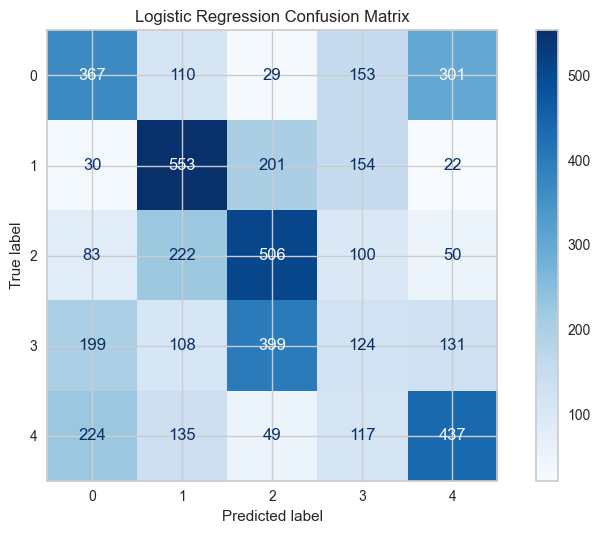

In [198]:
# Logistic Regression Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
ConfusionMatrixDisplay(conf_matrix_log_reg).plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression Confusion Matrix")
plt.tight_layout()
plt.show()

### KNN

In [199]:
best_k = None
best_p = None
best_accuracy = 0

k_values = range(1, 21)  # Try k values from 1 to 20
p_values = [1, 2]  # Minkowski distance: Manhattan (p=1), Euclidean (p=2)
accuracy_results = {p: [] for p in p_values}

# Finding the optimal k and p for knn
for p in p_values:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
        cv_scores = cross_val_predict(knn, X_train_scaled, y_train, cv=cv, method='predict')
        accuracy = accuracy_score(y_train, cv_scores)
        accuracy_results[p].append(accuracy)

        # Update the best parameters if accuracy improves
        if accuracy > best_accuracy:
            best_k = k
            best_p = p
            best_accuracy = accuracy

print(f"Best k: {best_k}, Best p: {best_p}, Best Accuracy: {best_accuracy:.3f}")


Best k: 2, Best p: 1, Best Accuracy: 0.941


We tried different k values and p values to find the best model.

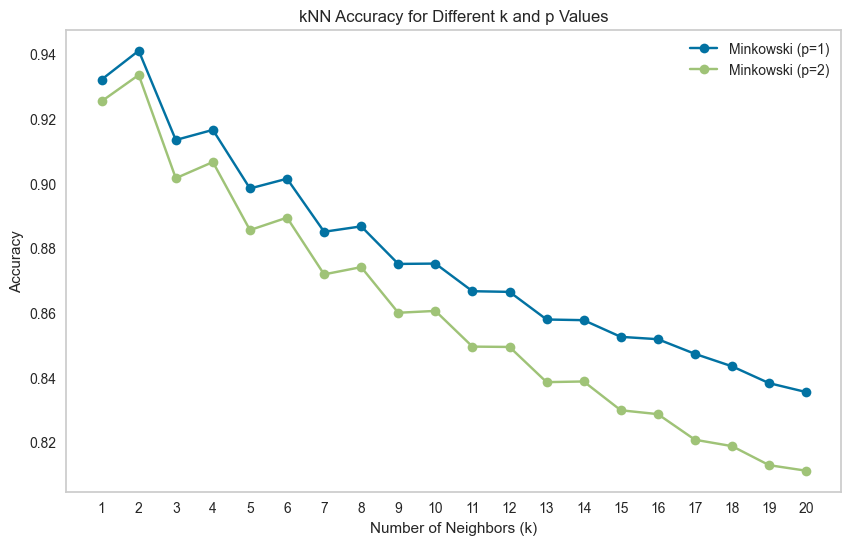

In [200]:
# Visualizing Hyperparameter Tuning Results
plt.figure(figsize=(10, 6))
for p, accuracies in accuracy_results.items():
    plt.plot(k_values, accuracies, marker='o', label=f'Minkowski (p={p})')

plt.title("kNN Accuracy for Different k and p Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

In [201]:
# Training and Evaluation with Optimal Hyperparameters
knn_optimal = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=best_p)
knn_optimal.fit(X_train_scaled, y_train)

# Cross-validation predictions
y_pred_knn_cv = cross_val_predict(knn_optimal, X_train_scaled, y_train, cv=cv)


In [202]:
# Cross-Validation Classification Report
print("\nkNN Classification Report:")
print(classification_report(y_train, y_pred_knn_cv))



kNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84      3838
         1.0       0.90      0.98      0.94      3842
         2.0       0.94      0.99      0.97      3842
         3.0       0.95      1.00      0.97      3846
         4.0       0.94      1.00      0.97      3846

    accuracy                           0.94     19214
   macro avg       0.94      0.94      0.94     19214
weighted avg       0.94      0.94      0.94     19214



The KNN model achieved 94% accuracy, with strong performance across most classes. Classes 1.0 to 4.0 show high precision, recall, and F1-scores (near 0.94-0.97). However, class 0.0 has a lower recall (73%), indicating it misses more samples from this class. Overall, the model performs well.

### Random Forest Classifier

In [203]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
y_pred_rf_cv = cross_val_predict(rf_model, X_train_scaled, y_train, cv=cv)


In [204]:
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("\nRandom Forest Classification Report:")
print(classification_report(y_train, y_pred_rf_cv))


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      3838
         1.0       0.95      0.97      0.96      3842
         2.0       1.00      0.97      0.98      3842
         3.0       1.00      0.99      0.99      3846
         4.0       0.99      1.00      0.99      3846

    accuracy                           0.97     19214
   macro avg       0.97      0.97      0.97     19214
weighted avg       0.97      0.97      0.97     19214



The Random Forest model achieved 97% accuracy, showing excellent performance across all classes. Precision, recall, and F1-scores for all classes are very high, ranging from 0.94 to 0.99. The macro and weighted averages are also 0.97, indicating balanced and robust classification. Overall, the model performs exceptionally well with no significant weaknesses.

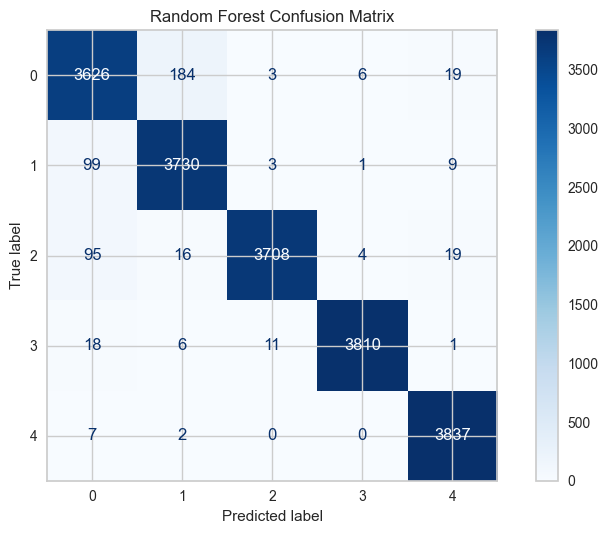

In [205]:
conf_matrix_rf = confusion_matrix(y_train, y_pred_rf_cv)
ConfusionMatrixDisplay(conf_matrix_rf).plot(cmap='Blues', values_format='d')
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Step 5: Model Evaluation and Visualizations


Confusion Matrix for Logistic Regression:


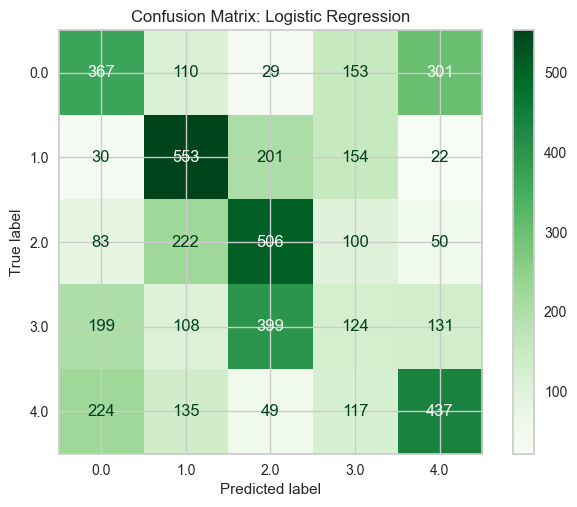

Confusion Matrix for KNN:


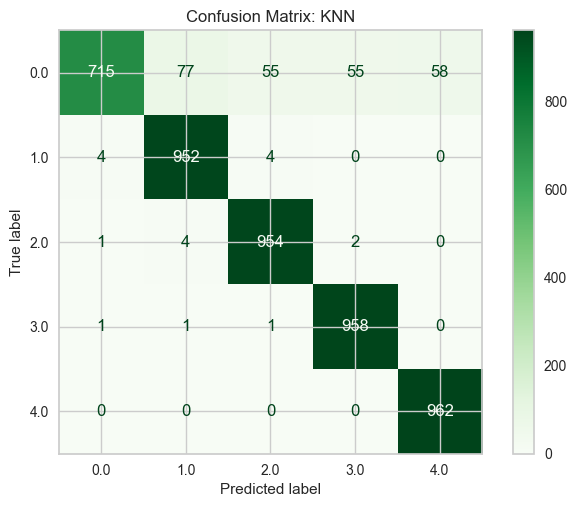

Confusion Matrix for Random Forest:


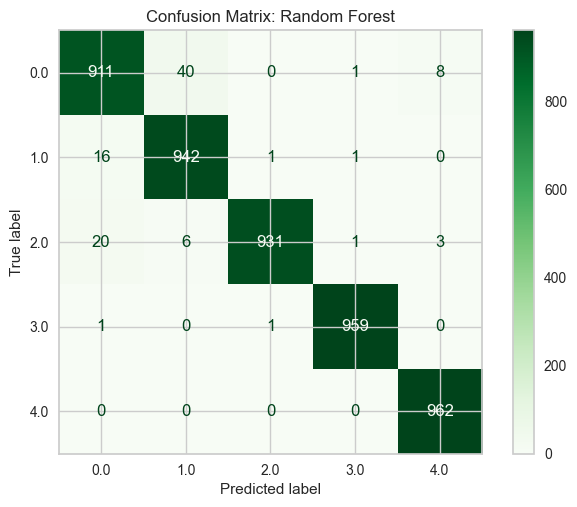

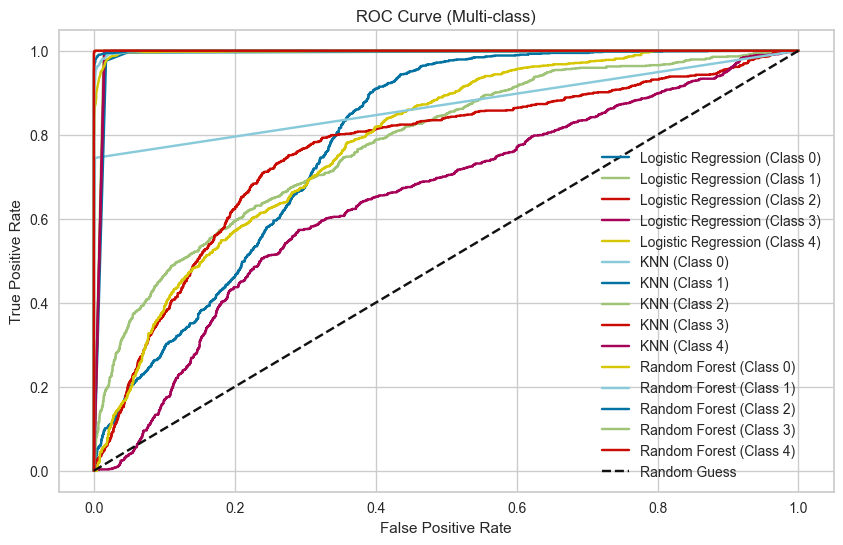

                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.413614   0.395951  0.413614  0.401764
KNN                  0.945254   0.948032  0.945254  0.942422
Random Forest        0.979392   0.979580  0.979392  0.979389


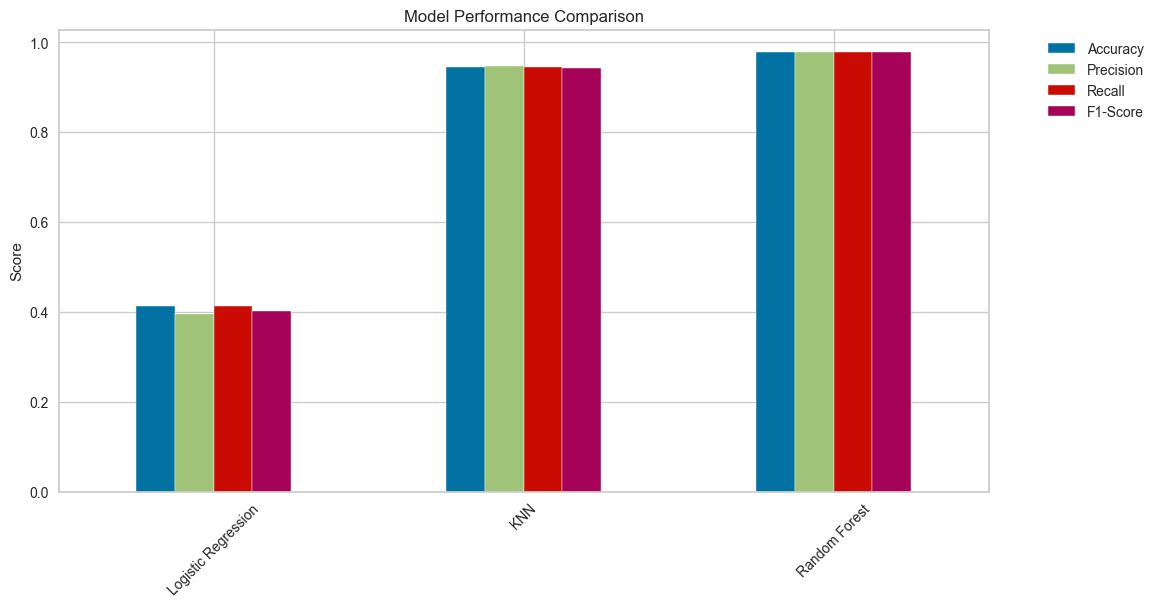

In [206]:
# Store the model names and predictions
models = {
    "Logistic Regression": log_reg_model,
    "KNN": knn_optimal,
    "Random Forest": rf_model
}

results = {}

# Calculate performance metrics
for name, model in models.items():
    # Predictions on the test dataset
    y_pred = model.predict(X_test_scaled)  # Test set predictions
    y_prob = model.predict_proba(X_test_scaled)  # Class probabilities

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average
    recall = recall_score(y_test, y_pred, average='weighted')  # Weighted average
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
    }

    # Confusion Matrix
    print(f"Confusion Matrix for {name}:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Greens', values_format='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

# ROC Curve (for multi-class target)
plt.figure(figsize=(10, 6))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)  # Class probabilities
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"{name} (Class {i})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-class)")
plt.legend(loc="lower right")
plt.show()

# Display performance results in a table
df_results = pd.DataFrame(results).T
print(df_results)

# Visualize performance comparison
df_results.plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


### Confusion Matrix Analysis

* Logistic Regression
    * Performed poorly overall, with significant misclassifications across all classes.
    * Struggles to differentiate between minority classes, as seen in the confusion matrix.

* K-Nearest Neighbors (KNN):
    * Significant improvement compared to Logistic Regression.
    * Confusion matrix shows fewer misclassifications but still struggles with boundary cases.

* Random Forest:
    * Outperformed both Logistic Regression and KNN.
    * Confusion matrix shows that this model is highly capable of distinguishing between all classes.

### ROC Curves Analysis
* Random Forest achieved the most consistent and highest true positive rates across all classes.
* Logistic Regression showed poor separation between classes.

### Performance Table and Bar Plot Analysis
* Random Forest is the clear winner, with KNN as the second-best model. Logistic Regression performed significantly worse due to the complexity of the dataset and its linear assumptions.

### Overfitting Risk:
* Logistic Regression: No risk of overfitting but underfits the data.
* KNN: Low risk of overfitting, mitigated by hyperparameter tuning.
* Random Forest: Slight risk of overfitting due to complexity, but cross-validation supports good generalization.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
